### Add libraries

In [156]:
#libraries
import numpy as np
import matplotlib as plt
import plotly.graph_objects as go

In [157]:
# tef,dtt,a: array [0..1501] of longint# 
# tav,ms,Ω,djs,djs1,μ,φ,Rsat,Xsp,Xsp1,PerSat,dφs,t2,t1,Jsc,Jr1,Jr2,j12,tpl1,tpl2:array [0..1500] of real# 
# t1s,t2s,te1s,te2s,Jadd1,Jadd2,k: array [1..10,0..1501] of real#
# Pp,Ps,Rp,Ap,m,Mp,φp,dφp,dt1:longint# 
# dt,n,ts,s,t:longint# 
# Rs,xp,xp1,Xplo,Xpl,Xpln,Xpln1,Xpl1o,G,Mstar,Mplanet,Ωp,F,f1,Alb:real# 
# delt,tint,i:integer# 
# delj,dttav,jav,sigmajdtt,sigmaj,sigmadtt,Jres,Jcut,Jcuto:real#
# PpObs,t0,Korr,TTVmax,TTVmin:real# 
# PerP:real#

# Jo:array [0..1500,-70000..70000] of real#
# V1,V2,V3,V4,V5,L,S3,djp1,djp,djp0:real#
# Rz,Aps,Ass:longint# 

# xs,xs1,dJ:real# 

# te1,te2:integer# 

# nn,sumn,ntav,sumtav,Delta,DeltaPp,Deltat0:real# 

### Define all the constants i.e. star/planet/moons/noise

In [279]:
m=2;
ms=[None]*3
a=[None]*3
Rsat=[None]*3

G=6.67*10**(-11)#
Mstar=1.99*10**30#
Mplanet=5.99*10**24#

Mp=1#{Масса планеты в относительных единицах}
ms[0]=1/81.3#{Масса спутника-1 в массах планеты}
ms[1]=1/95#{Масса спутника-2 в массах планеты}
ms[2]=1/98#
Ap=149598000# {Большая полуось орбиты планеты в км} 
Pp=31556952# {Период обращения планеты вокруг звезды в сек}
Ps=245000# {Период обращения спутника вокруг планеты в сек} 
Rp=6400# {Радиус планеты в км} 
Rs=695000# {Радиус звезды в км} 

a[0]=384000#{Радиус орбиты спутника-1 в км}
a[1]=241904.8416#{Радиус орбиты спутника-2 в км}
a[2]=699000#

Rsat[0]=1738# {Радиус спутника-1 в км} 
Rsat[1]=1450# {Радиус спутника-2 в км} 
Rsat[2]=1950#
Alb=0.3#
s=100# {Число транзитов системы спутники-планета}  
tint=6500# {Время усреднения яркости до/после затмения в сек} 
delJ=0.000007#{Погрешность измения яркости, случайная добавка принимает значения от delJ до +delJ, всегда равна нулю при delt=0} 
delt=6# {Погрешность изменения времени транзита, принимает значения от -delt до +delt, в сек} 
φp=0# what is it?
Ωp=np.sqrt(G*Mstar/1000000000/Ap/Ap/Ap)#
Vp=np.sqrt(G*Mstar/1000000000/Ap)
djp=(Rp/Rs)**2#
djp0=Rp/Rs#
PerP=2*np.pi/Ωp#
Ω=[None]*m
djs=[None]*m
μ=[None]*m
dφs=[None]*m
PerSat=[None]*m
φ=[None]*m
dφs=[None]*m
t1=[None]*s   
t2=[None]*s
Xsp=[0]*m
Xspprev=[0]*m
djs1=[0]*m
tpl1=[None]*s
tpl2=[None]*s
Ω=[None]*m
w1 = s
T=70000
t1s = [[0 for x in range(m)] for y in range(w1)] 
t2s = [[0 for x in range(m)] for y in range(w1)] 
te1s = [[0 for x in range(int(-T/10),int(T/10))] for y in range(w1)] 
te2s= [[0 for x in range(int(-T/10),int(T/10))] for y in range(w1)] 
Jo= [[0 for x in range(int(-T/10),int(T/10))] for y in range(w1)] 
Xpprev=0
Xplnprev=0
dur=2*Rs/Vp    #transit duration

In [280]:
import math
frac, _ = math.modf(2.5)

### Parameters of the moons

In [281]:
for i in range(m):
    Ω[i]=np.sqrt(G*Mplanet/1000000000/a[i]/a[i]/a[i])# {Доп. коэфф. необходим при переводе из км в метры}
    djs[i]=(Rsat[i]**2)/(Rs**2)# {Изменение яркости звезды во время транзита i-го спутника}
    μ[i]=(Mp/ms[i])# {Отношение масс i-го спутника к массе планеты.}
    print(Ω[i])
    print('djs= ', djs[i])#
    print('μ=', μ[i])#
#     PerSat[i]=2*np.pi/Ω[i]#
    dφs[i]=(Ω[i]*(PerP-dur)/2/np.pi-int(Ω[i]*(PerP-dur)/2/np.pi))# Phase shift?+np.pi/2
    print('Ps-',i,'=',PerSat[i])#
    print('dφs-',i,'=',dφs[i])#
    
print('Pp=',PerP)#

2.6563144917024576e-06
djs=  6.253597639873713e-06
μ= 81.3
Ps- 0 = None
dφs- 0 = 0.32097483860699505
5.312628982739993e-06
djs=  4.352776771388645e-06
μ= 95.0
Ps- 1 = None
dφs- 1 = 0.6419496738795161
Pp= 31555792.695338428


In [282]:
int(2.93444)

2

### Loop over s transits

In [283]:
#we have to understand this loop
tpl1=[-23540]*s
tpl2=[23550]*s
# print(len(Jo))

for n in range(s):
    #{n-transit's number}
    for i in range(m):
        φ[i]=2*np.pi*(n*dφs[i]-int(n*dφs[i]))# current phase of each satellite?
#         print(φ[i])
    
    t=-T#  
    while t<T: #by 10 second iteration
        t=t+10#
        
        Jo[n][int(t/10)]=1
#         dt=dt+5
        Xplo=0#
        for i in range(m):#Contribution of every satellite to planet's position
            Xplo=Xplo-(a[i]/(μ[i]+1)*np.sin(Ω[i]*t+φ[i]))
        Xp=0#
        Xp=Xplo+Ap*np.sin(Ωp*t+φp)#{координата центра планеты в момент t}
#         Xp1=0#
#         Xp1=Xplo+Ap*np.sin(Ωp*(t+5)+φp)#{координата центра планеты в момент t+1}
#         print('Xp=',Xp)
#         print('Xp=',Xp)
        
        
        #every time check the condition:
        
        if (-Xpprev>Rs+Rp) and (-Xp<Rs+Rp):
            t1[n]=t# {Условие вступления центра планеты на диск звезды, t1[n]-время начала n-го транзита в сек}
        if (Xpprev<Rs+Rp) and (Xp>Rs+Rp):
            t2[n]=t# {Условие схода центра планеты с диска звезды, t2[n]-время окончания n-го транзита в сек}
        Xpprev=Xp
        
#{Транзиты планеты без участия спутников}
#         Xpln=Ap*np.sin(Ωp*t+φp)
#         Xpln1=Ap*np.sin(Ωp*(t+1)+φp)#
        
#         if (-Xplnprev>Rs+Rp) and (-Xpln<Rs+Rp):
#             tpl1[n]=t# {Условие вступления центра планеты на диск звезды, tpl1[n]-время начала n-го транзита в сек}
#         if (Xplnprev<Rs+Rp) and (Xpln>Rs+Rp):
#             tpl2[n]=t# {Условие схода центра планеты с диска звезды, tpl2[n]-время окончания n-го транзита в сек} 
#         Xplnprev=Xpln  
#         print('Xpl',Xp, 't=',t)

        
    
        for i in range(m):
            Xspprev[i]=Xsp[i]
            Xsp[i]=Xp+a[i]*(μ[i]/(μ[i]+1))*np.sin(Ω[i]*t+φ[i])# {координата центра спутника в момент t}
#             print('Xspprev=',Xspprev[i],'t=',t)
#             Xsp1[i]=Xp1+a[i]*(μ[i]/(μ[i]+1))*np.sin(Ω[i]*(t+1)+φ[i])# {координата центра спутника в момент t+1}
            if (-Xspprev[i]>Rs) and (-Xsp[i]<Rs):
                t1s[n][i]=t # {Условие вступления центра спутника на диск звезды, t1s[n]-время начала n-го транзита в сек} 
#                 print('t=',t)
            if (Xspprev[i]<Rs) and (Xsp[i]>Rs):
                t2s[n][i]=t# {Условие схода центра спутника с диска звезды, t2[n]-время окончания n-го транзита в сек}
#                 print('t=',t)
#             print('Xsp=',Xsp)
            
        for i in range(m):
            l=0
            S3=0
            v3=0 # what is it?
            v1=0
            v2=0
            if (abs(Xsp[i])<(Rs+Rsat[i])) and (abs(Xsp[i])>Rs):
                v1=1
            else:
                v1=0
                
            if  (abs(Xsp[i])>(Rs-Rsat[i])) and (abs(Xsp[i])<Rs):
                v2=1 
            else:
                v2=0
            if abs(Xsp[i])<(Rs-Rsat[i]):
                v3=1
            else:
                v3=0
            djs1[i]=0 
            if v1>0 or v2>0:
#                 Jo[n][int(t/10)]=Jo[n][int(t/10)]-djs[i]*0.5
#             if v3>0:
#                 Jo[n][int(t/10)]=Jo[n][int(t/10)]-djs[i]
# #                 print('Xsp[i]=', Xsp[i])
                l=np.sqrt(Rsat[i]**2-(abs(Xsp[i])-Rs)**2)
                S3=np.arccos(abs(-Rs+abs(Xsp[i]))/Rsat[i])*Rsat[i]**2-l*abs(-Rs+abs(Xsp[i]))
                djs1[i]=S3/(np.pi*Rs*Rs)
#             Jo[n][int(t/10)]=Jo[n][int(t/10)]-djs1[i]*v1-(djs[i]-djs1[i])*v2-djs[i]*v3#

            Jo[n][int(t/10)]=Jo[n][int(t/10)]-(1-0.65+0.65*np.sqrt(abs(1-(abs(Xsp[i]))*(abs(Xsp[i]))/Rs/Rs)))*(djs1[i]*v1+(djs[i]-djs1[i])*v2+djs[i]*v3)   
#             print(Jo[n][int(t/10)])
#             print('v3=',v3)
#             print('Jo1=',Jo[n][int(t/10)])
        v3=0 # what is it?
        v1=0
        v2=0
        if (abs(Xp)<(Rs+Rp)) and (abs(Xp)>Rs):
            v1=1
        else:
            v1=0 
        if  (abs(Xp)>(Rs-Rp)) and (abs(Xp)<Rs):
            v2=1 
        else:
            v2=0
        if abs(Xp)<(Rs-Rp):
            v3=1
        else:
            v3=0
        l=0
        S3=0
        djp1=0
        if v1>0 or v2>0:
#             print('t=',t)
#             print('Xp=', Xp)
#             l=abs(abs(Xp)-Rs)
#             print('l=',l)
#             S3=1/2*(Rp**2)*np.arcsin(2*l*np.sqrt(Rp**2-l**2)/Rp**2)-l*np.sqrt(Rp**2-l**2)
            l=np.sqrt(Rp**2-(abs(Xp)-Rs)**2)
            S3=np.arccos(abs(-Rs+abs(Xp))/Rp)*Rp*Rp-l*abs(-Rs+abs(Xp))#
            djp1=S3/(np.pi*Rs*Rs)
#             Jo[n][int(t/10)]=1-djp1*v1-(djp-djp1)*v2#
#         if v3>0:
#             Jo[n][int(t/10)]=1-djp*v3
            
#         v3=1
        Jo[n][int(t/10)]=Jo[n][int(t/10)]-(1-0.65+0.65*np.sqrt(abs(1-(abs(Xp))*(abs(Xp))/Rs/Rs)))*(djp1*v1+(djp-djp1)*v2+djp*v3)
#         print('Jo2=',Jo[n][int(t/10)],'t=',t) 
# print('J=',Jo[n][int(t/10)])

#             djp1=(S3/(np.pi*Rs*Rs))#
            
#         Jo[n][t]=Jo[n][t]-(djp1*(V1+V5)+(djp-djp1)*(V2+V4)+djp*V3)#
#          {Jo[n,t]=Jo[n,t]-(1-0.65+0.65*np.sqrt(abs(1-(abs(Xp))*(abs(Xp))/Rs/Rs)))*(djp1*(V1)+(djp-djp1)*(V2)+djp*V3)#}

#     print(t1[n])
#     print(t2[n])
# print(t1s)
# print(t2s)
print('tpl1=',tpl1)
print('tpl2=',tpl2)
#     for i in range(m):
#         te1s[n][i]=t1[n]-t1s[n][i]#{Продолж. нахождения спутников на диске звезды до и после транзита планеты}
#         te2s[n][i]=t2s[n][i]-t2[n]#

tpl1= [-23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540, -23540]
tpl2= [23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 2355

In [284]:
from scipy.stats import spearmanr 
Jr1=[0]*s
Jr2=[0]*s
J12=[0]*s
tav=[0]*s
nn=0
sumn=0
ntav=0
sumtav=0

for n in range(s):
    for t in range(np.round(t1[n]-tint),np.round(t1[n])):
                   Jr1[n]=Jr1[n]+Jo[n][int(t/10)]
              
    for t in range(np.round(t2[n]),np.round(t2[n]+tint)):
                   Jr2[n]=Jr2[n]+Jo[n][int(t/10)]#

                   
for n in range(s):
#     print(n,'Jr1= ',Jr1[n])#
#     print(n,'Jr2= ',Jr2[n])# 
    Jr1[n]=Jr1[n]/tint#
    Jr2[n]=Jr2[n]/tint#
    J12[n]=Jr2[n]/Jr1[n]# {отношение j2[n] и j1[n]}
#     {j12[n]=j12[n]+2*delj*(np.random(delt+1)-(delt+1)/2)/(delt+1)#}
#     print('J12[',n,']=',J12[n],'#')#


# for n in range(s):
#     t1[n]=t1[n]+2*Random(delt+1)-(delt+1)#{Эта строчка и две следующие - случайные погрешности
#     t2[n]=t2[n]+2*Random(delt+1)-(delt+1)# }


for n in range(s):
    tav[n]=np.round((t1[n]+t2[n])/2)# {tav[n]-время середины n-того
    nn=nn+n*n# {отсюда и до конца абзаца составление эфемериды планеты методом наименьших квадратов
    sumn=sumn+n# 
    ntav=ntav+n*tav[n]# 
    sumtav=sumtav+tav[n]# 


Delta=nn*(s+1)-sumn*sumn# 
DeltaPp=ntav*(s+1)-sumtav*sumn# 
Deltat0=nn*sumtav-sumn*ntav# 
PpObs=DeltaPp/Delta# 
t0=Deltat0/Delta

                   
             
print('Pp=', PpObs,' t0=',t0)# {ppObs-наблюдаемый период обращения планеты вокруг звезды, на основе известных времен транзитов в сек} 
# {t0- постоянная, входящая в эферемениду, измеряется в сек} 



tef=[0]*s
dtt=[0]*s
x=[]
y=[]
for n in range(s):

    tpl1[n]=PpObs*(n-np.arcsin(Rs/Ap)/2/np.pi)#
    tpl2[n]=PpObs*(n+np.arcsin(Rs/Ap)/2/np.pi)#}
    dtt[n]=np.round(tav[n])-tef[n]# {dtt[n] - вариация времени середины n-того транзита планеты в сек
    tef[n]=np.round(n*PpObs+t0)# tef[n] - время середины n-того транзита планеты согласно эфемериде в сек} 
    dtt[n]=np.round((t1[n]-tpl1[n]+t2[n]-tpl2[n])/2)# {dtt[n] - вариация времени середины n-того транзита планеты в сек} 
    
    x.append(dtt[n])
    y.append(-(1-1/J12[n])*1000000)  
    
    r,p=spearmanr(x,y)
#     print(r)
#     print(p)
    
#     print('dtt[n]=','  ',dtt[n])#
#     print('TDV[',n,']=',-(tpl2[n]-tpl1[n])+(t2[n]-t1[n]),'#')#}
#     print('[',(t1[n]-tpl1[n]+t2[n]-tpl2[n])/2,',',(1-1/J12[n])*1000000,']',',')# 
    
#     print('[',(t1[n]-tpl1[n]+t2[n]-tpl2[n])/2,',', -(tpl2[n]-tpl1[n])+(t2[n]-t1[n]),']',',')#}
#     print('TTV[',n,']=',(t1[n]-tpl1[n]+t2[n]-tpl2[n])/2,'#')
    
 



# dttav=0
# Sigmaj=0
# Sigmadtt=0
# Sigmajdtt=0    
    
    
# For n in range(s):
#     jav=jav+j12[n]/(s+1)# print('jav=',jav:8:8)#    
#     dttav=dttav+dtt[n]/(s+1)# print('dttav=',dttav:8:4)#    
#     Sigmaj=Sigmaj+j12[n]*j12[n]-jav*jav# Sigmaj=np.sqrt(Sigmaj)#    
#     Sigmadtt=Sigmadtt+dtt[n]*dtt[n]-dttav*dttav# Sigmadtt=np.sqrt(Sigmadtt)#    
#     Sigmajdtt=Sigmajdtt+(j12[n]-jav)*(dtt[n]-dttav)#     
    



# print(Sigmaj,' ',Sigmadtt,' ',Sigmajdtt)# 
# Korr=Sigmajdtt/Sigmaj/Sigmadtt# 
# print('Коэффициент корреляции, Korr=', Korr:4:3)# 


Pp= -0.08885502000381025  t0= 8.760716326919413


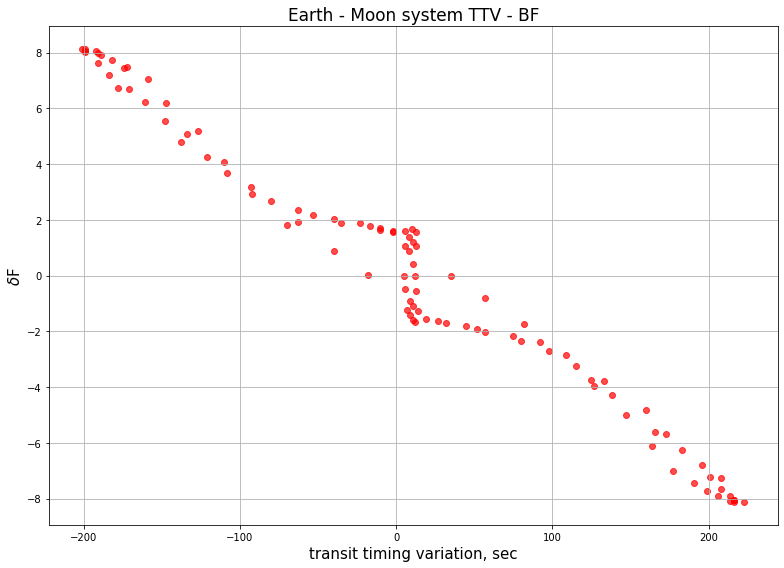

In [285]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.7,c='r')

ax.set_xlabel(r'transit timing variation, sec', fontsize=15)
ax.set_ylabel(r'$\delta$F', fontsize=15)
ax.set_title('Earth - Moon system TTV - BF',fontsize=17)
fig.set_size_inches(11,8)
ax.grid(True)
fig.tight_layout(h_pad=5,w_pad=10)

In [132]:
t = np.linspace(0, 10, 100)
# pio.templates.default = "simple_white"
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x, y=y,
    name='TTV-BF', mode='lines',
    marker_color='rgba(255, 182, 193, .9)'
))
fig.update_layout(
    xaxis_title="TTV, sec",
    yaxis_title="BF, nomalized units")
# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
fig.update_layout(title='TTV-BF for Earth-Moon with initial orbital speed',
                  yaxis_zeroline=True, xaxis_zeroline=False,plot_bgcolor= "rgb(255, 255, 255)")
# hovermode='closest'
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='rgb(0, 255, 255)')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgb(0, 255, 255)')
fig.show()

### Plot star flux for one transit

In [90]:
curve=[]
index=[]
k=0
for i in range(-6000,6000):
#     if Jo[2][i]!=1:
    curve.append(Jo[2][i])
    index.append(k)
    k=k+1
#         print('i=',i*10,Jo[2][i])

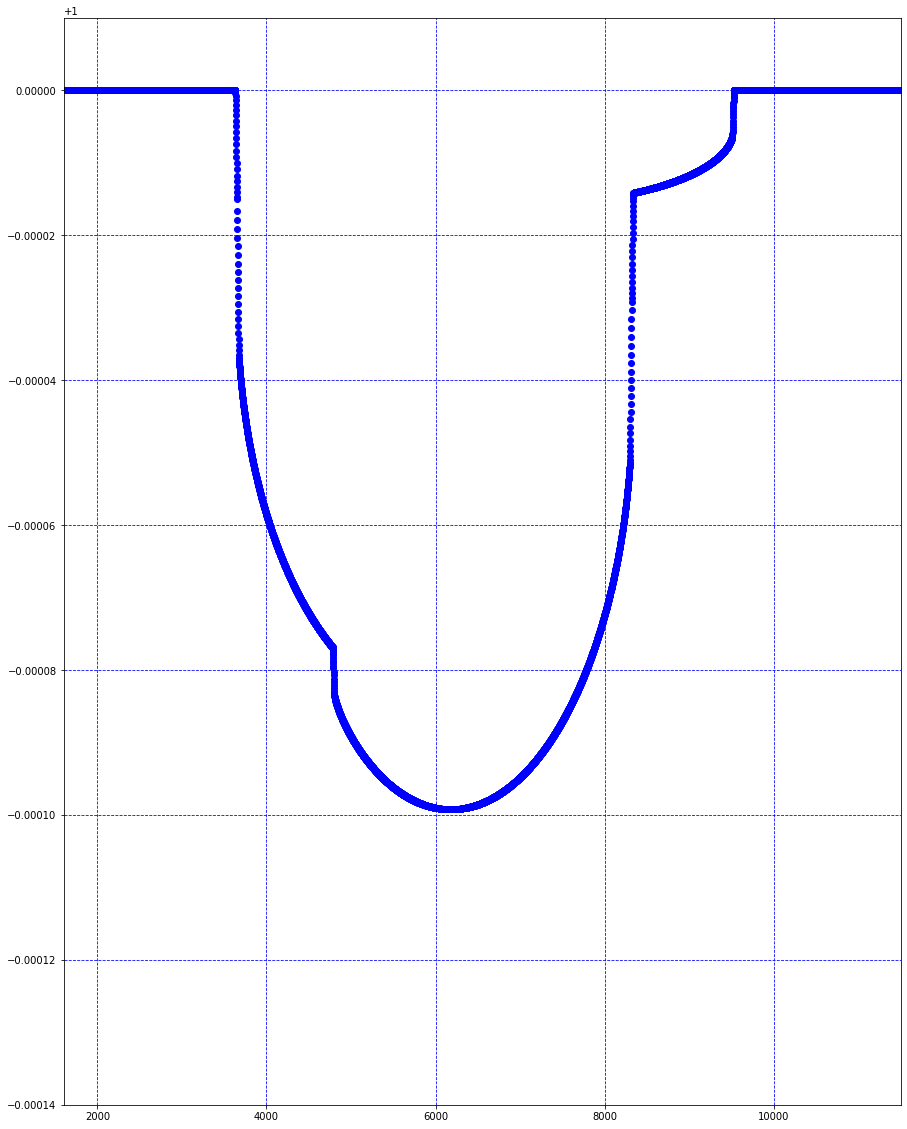

In [91]:
import matplotlib.pyplot as plt 

from os import path
import matplotlib.backends.backend_pdf
import matplotlib.dates as mdates

  
f=plt.figure(figsize=[15,20])
plt.gca().set_xlim([1600,11500])
plt.gca().set_ylim([0.99986,1.00001])
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10000))

ax = plt.gca()
ax.set_facecolor((1.0, 1, 1))
plt.plot(index,curve,'bo')

plt.grid(True,color='blue',linestyle="--")
plt.show()